In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import kagglehub


2025-04-10 22:07:16.230604: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 22:07:16.421935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744315636.491442    1326 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744315636.511180    1326 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744315636.666548    1326 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [7]:
path = kagglehub.dataset_download("yudhaislamisulistya/plants-type-datasets")

print("Path to dataset files:", path)

Resuming download from 24117248 bytes (958524011 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/yudhaislamisulistya/plants-type-datasets?dataset_version_number=16 (24117248/982641259) bytes left.


100%|██████████| 937M/937M [00:24<00:00, 38.7MB/s] 

Extracting files...


Path to dataset files: /home/maiko/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16


In [8]:
target_dir = "./data/plants"

!mkdir -p {target_dir}
!mv {path}/* {target_dir}/

print(f"Files moved to: {target_dir}")


Files moved to: ./data/plants


In [ ]:
import os

# List files and folders in the target directory
for root, dirs, files in os.walk(target_dir):
    print(f"\n📁 {root}")
    for d in dirs:
        print(f"  └── 📂 {d}")
    for f in files[:5]: 
        print(f"  └── 📄 {f}")



📁 ./data/plants
  └── 📂 split_ttv_dataset_type_of_plants

📁 ./data/plants/split_ttv_dataset_type_of_plants
  └── 📂 Validation_Set_Folder
  └── 📂 Test_Set_Folder
  └── 📂 Train_Set_Folder

📁 ./data/plants/split_ttv_dataset_type_of_plants/Validation_Set_Folder
  └── 📂 curcuma
  └── 📂 melon
  └── 📂 waterapple
  └── 📂 banana
  └── 📂 aloevera
  └── 📂 orange
  └── 📂 cucumber
  └── 📂 coconut
  └── 📂 ginger
  └── 📂 papaya
  └── 📂 shallot
  └── 📂 watermelon
  └── 📂 cantaloupe
  └── 📂 mango
  └── 📂 eggplant
  └── 📂 pineapple
  └── 📂 galangal
  └── 📂 longbeans
  └── 📂 kale
  └── 📂 tobacco
  └── 📂 guava
  └── 📂 pomelo
  └── 📂 corn
  └── 📂 bilimbi
  └── 📂 soybeans
  └── 📂 spinach
  └── 📂 sweet potatoes
  └── 📂 peper chili
  └── 📂 paddy
  └── 📂 cassava

📁 ./data/plants/split_ttv_dataset_type_of_plants/Validation_Set_Folder/curcuma
  └── 📄 curcuma726.jpg
  └── 📄 aug_0_2476.jpg
  └── 📄 aug_0_8918.jpg
  └── 📄 aug_0_7784.jpg
  └── 📄 aug_0_497.jpg

📁 ./data/plants/split_ttv_dataset_type_of_plants/Validat

In [29]:
data_dir = target_dir


train_dir = os.path.join(data_dir, 'split_ttv_dataset_type_of_plants/Train_Set_Folder')
validation_dir = os.path.join(data_dir, 'split_ttv_dataset_type_of_plants/Validation_Set_Folder')
test_dir = os.path.join(data_dir, 'split_ttv_dataset_type_of_plants/Test_Set_Folder')

# Print paths to verify
print(f"Training directory: {train_dir}")
print(f"Validation directory: {validation_dir}")
print(f"Test directory: {test_dir}")

# Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation generator (no augmentation, just preprocessing)
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Test generator (no augmentation, just preprocessing)
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Set up parameters
img_height, img_width = 299, 299  # InceptionV3 input size
batch_size = 32

# Create training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create validation generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Print number of classes and samples
print(f"Number of classes: {train_generator.num_classes}")
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")
print(f"Number of test samples: {test_generator.samples}")

# Let's also check the class names/indices mapping
class_indices = train_generator.class_indices
print("\nClass mapping:")
for class_name, index in class_indices.items():
    print(f"{index}: {class_name}")


Training directory: ./data/plants/split_ttv_dataset_type_of_plants/Train_Set_Folder
Validation directory: ./data/plants/split_ttv_dataset_type_of_plants/Validation_Set_Folder
Test directory: ./data/plants/split_ttv_dataset_type_of_plants/Test_Set_Folder
Found 23972 images belonging to 30 classes.
Found 3030 images belonging to 30 classes.
Found 2998 images belonging to 30 classes.
Number of classes: 30
Number of training samples: 23972
Number of validation samples: 3030
Number of test samples: 2998

Class mapping:
0: aloevera
1: banana
2: bilimbi
3: cantaloupe
4: cassava
5: coconut
6: corn
7: cucumber
8: curcuma
9: eggplant
10: galangal
11: ginger
12: guava
13: kale
14: longbeans
15: mango
16: melon
17: orange
18: paddy
19: papaya
20: peper chili
21: pineapple
22: pomelo
23: shallot
24: soybeans
25: spinach
26: sweet potatoes
27: tobacco
28: waterapple
29: watermelon


Training top layers only...


/home/maiko/miniconda3/envs/cvai/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-04-10 22:40:36.558730: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8408', 64 bytes spill stores, 64 bytes spill loads

2025-04-10 22:40:36.770945: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8408', 896 bytes spill stores, 896 bytes spill loads

2025-04-10 22:40:36.847733: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8408', 4228 bytes spill stores, 4204 bytes spill loads

2025-04-10 22:40:36.852505: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8408', 632 bytes spill stores, 632 bytes spill loads



374/749 ━━━━━━━━━━━━━━━━━━━━ 1:25 229ms/step - accuracy: 0.5309 - loss: 1.7973

2025-04-10 22:42:07.484257: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8401', 12 bytes spill stores, 12 bytes spill loads

2025-04-10 22:42:07.573401: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8401', 112 bytes spill stores, 112 bytes spill loads

2025-04-10 22:42:07.598524: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8401', 8 bytes spill stores, 8 bytes spill loads

2025-04-10 22:42:07.893615: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8408', 256 bytes spill stores, 256 bytes spill loads

2025-04-10 22:42:07.910844: I external

749/749 ━━━━━━━━━━━━━━━━━━━━ 193s 247ms/step - accuracy: 0.6165 - loss: 1.4177 - val_accuracy: 0.8378 - val_loss: 0.5061
Epoch 2/10
  1/749 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.8438 - loss: 0.4495

/home/maiko/miniconda3/envs/cvai/lib/python3.9/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


749/749 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8438 - loss: 0.4495 - val_accuracy: 0.8371 - val_loss: 0.5085
Epoch 3/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 170s 226ms/step - accuracy: 0.8257 - loss: 0.5429 - val_accuracy: 0.8850 - val_loss: 0.3583
Epoch 4/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8438 - loss: 0.4541 - val_accuracy: 0.8790 - val_loss: 0.3795
Epoch 5/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 170s 227ms/step - accuracy: 0.8526 - loss: 0.4474 - val_accuracy: 0.8880 - val_loss: 0.3213
Epoch 6/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7500 - loss: 0.7205 - val_accuracy: 0.8963 - val_loss: 0.2988
Epoch 7/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 169s 225ms/step - accuracy: 0.8770 - loss: 0.3688 - val_accuracy: 0.9245 - val_loss: 0.2279
Epoch 8/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8125 - loss: 0.3886 - val_accuracy: 0.9195 - val_loss: 0.2338
Epoch 9/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 169s 225ms/step - accuracy: 0.8917 - loss: 0.3225 - val_accurac

2025-04-10 22:55:24.710936: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10848', 4 bytes spill stores, 4 bytes spill loads

2025-04-10 22:55:24.725026: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10848_0', 204 bytes spill stores, 420 bytes spill loads

2025-04-10 22:55:24.730154: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10848', 84 bytes spill stores, 84 bytes spill loads



682/749 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.9000 - loss: 0.3092

2025-04-10 22:58:00.798252: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10848', 48 bytes spill stores, 48 bytes spill loads



749/749 ━━━━━━━━━━━━━━━━━━━━ 186s 234ms/step - accuracy: 0.9016 - loss: 0.3037 - val_accuracy: 0.9614 - val_loss: 0.1026
Epoch 2/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8438 - loss: 0.3927 - val_accuracy: 0.9624 - val_loss: 0.1041
Epoch 3/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 169s 226ms/step - accuracy: 0.9538 - loss: 0.1334 - val_accuracy: 0.9731 - val_loss: 0.0795
Epoch 4/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 0.9747 - val_loss: 0.0787
Epoch 5/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 169s 225ms/step - accuracy: 0.9674 - loss: 0.0969 - val_accuracy: 0.9744 - val_loss: 0.0739
Epoch 6/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9688 - loss: 0.1240 - val_accuracy: 0.9747 - val_loss: 0.0735
Epoch 7/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 170s 227ms/step - accuracy: 0.9738 - loss: 0.0773 - val_accuracy: 0.9811 - val_loss: 0.0592
Epoch 8/10
749/749 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9688 - loss: 0.1476 - val_accurac

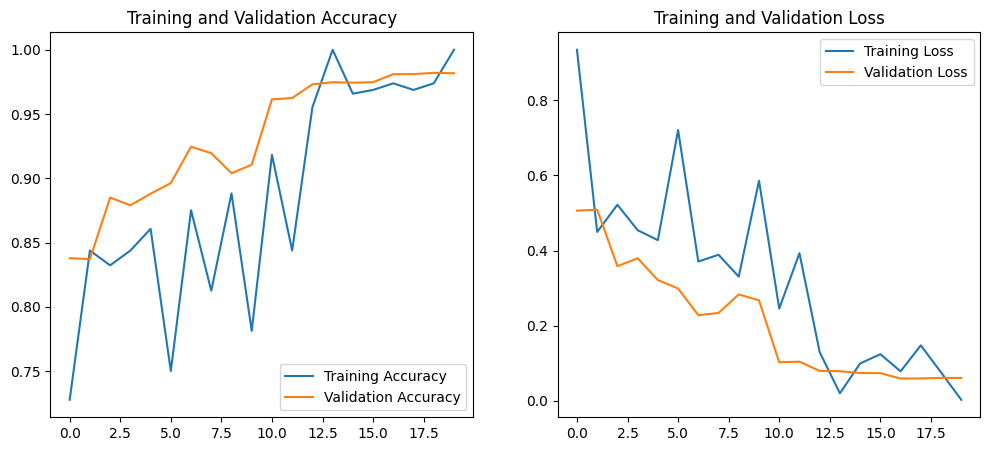

Fine-tuning complete. Model saved as 'plant_finetuned_inceptionv3.h5'


In [30]:
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# Add a final output layer with softmax for classification
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the fine-tuned model
model = Model(inputs=base_model.input, outputs=predictions)

# First, freeze all base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with frozen base layers
print("Training top layers only...")
history_1 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Now unfreeze some of the top layers of the base model
# Unfreeze the last 2 inception blocks
for layer in model.layers:
    layer.trainable = True
    
fine_tune_at = -50  # Approximately the last 2 InceptionV3 blocks
for layer in model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])


print("Fine-tuning the model...")
history_2 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Save the fine-tuned model
model.save('plant_finetuned_inceptionv3.h5')

# Plot training history
def plot_training_history(history_1, history_2):
    # Combine histories
    acc = history_1.history['accuracy'] + history_2.history['accuracy']
    val_acc = history_1.history['val_accuracy'] + history_2.history['val_accuracy']
    loss = history_1.history['loss'] + history_2.history['loss']
    val_loss = history_1.history['val_loss'] + history_2.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.savefig('training_history.png')
    plt.show()

plot_training_history(history_1, history_2)

print("Fine-tuning complete. Model saved as 'plant_finetuned_inceptionv3.h5'")